In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ikt_org.xlsx to ikt_org (7).xlsx


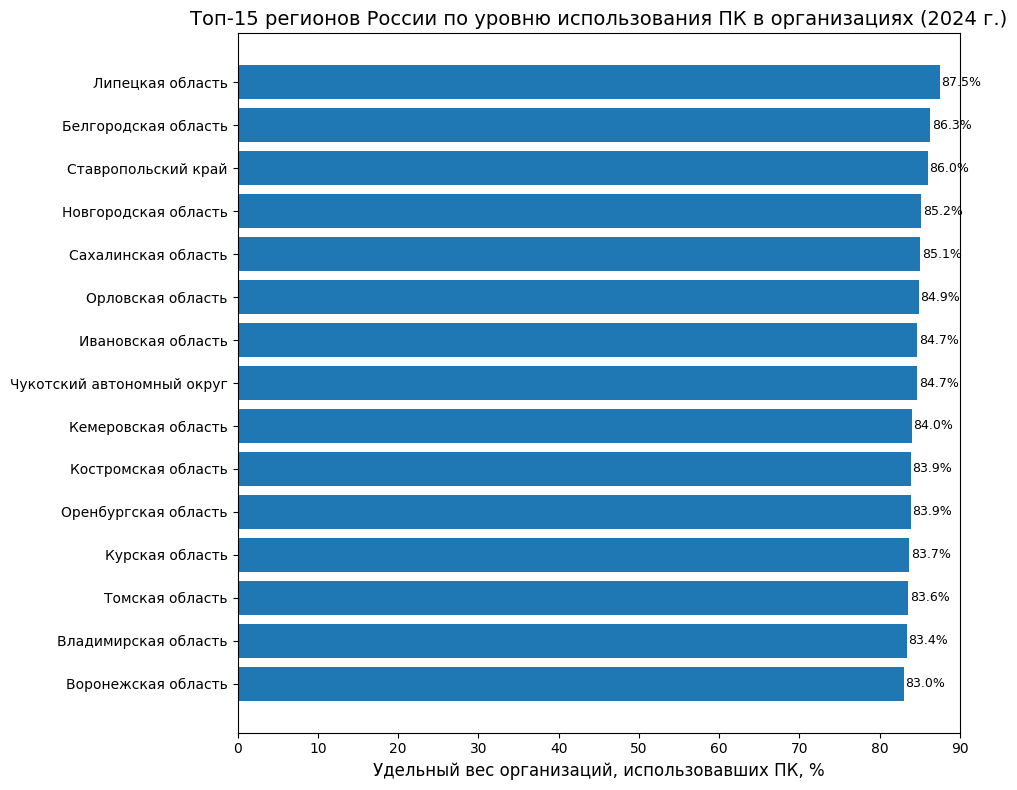

In [ ]:
# Загрузка данных
df = pd.read_excel('ikt_org.xlsx', header=None, names=['region', 'value'])

# Преобразуем value в числовой формат и удаляем строки с некорректными значениями
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Удаляем строки, где region или value — NaN
df = df.dropna(subset=['region', 'value']).reset_index(drop=True)

# Теперь можно безопасно работать с region как со строками
exclude_keywords = [
    'Российская Федерация',
    'федеральный округ',
    'в том числе',
    'без АО',
    '1)',
    '2)',
    '" … "',
    'Ханты-Мансийский автономный округ',
    'Ямало-Ненецкий автономный округ',
    'Ненецкий автономный округ'
]

escaped_keywords = [re.escape(word) for word in exclude_keywords]
pattern = '|'.join(escaped_keywords)

mask = ~df['region'].str.contains(pattern, case=False, na=False)
df_clean = df[mask].copy()

top15 = df_clean.nlargest(15, 'value')

# Построение графика
plt.figure(figsize=(10, 8))
bars = plt.barh(top15['region'][::-1], top15['value'][::-1], color='#1f77b4')

# Подписи процентов
for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}%', va='center', fontsize=9)

plt.xlabel('Удельный вес организаций, использовавших ПК, %', fontsize=12)
plt.title('Топ-15 регионов России по уровню использования ПК в организациях (2024 г.)', fontsize=14)
plt.xlim(0, 90)
plt.tight_layout()
plt.show()

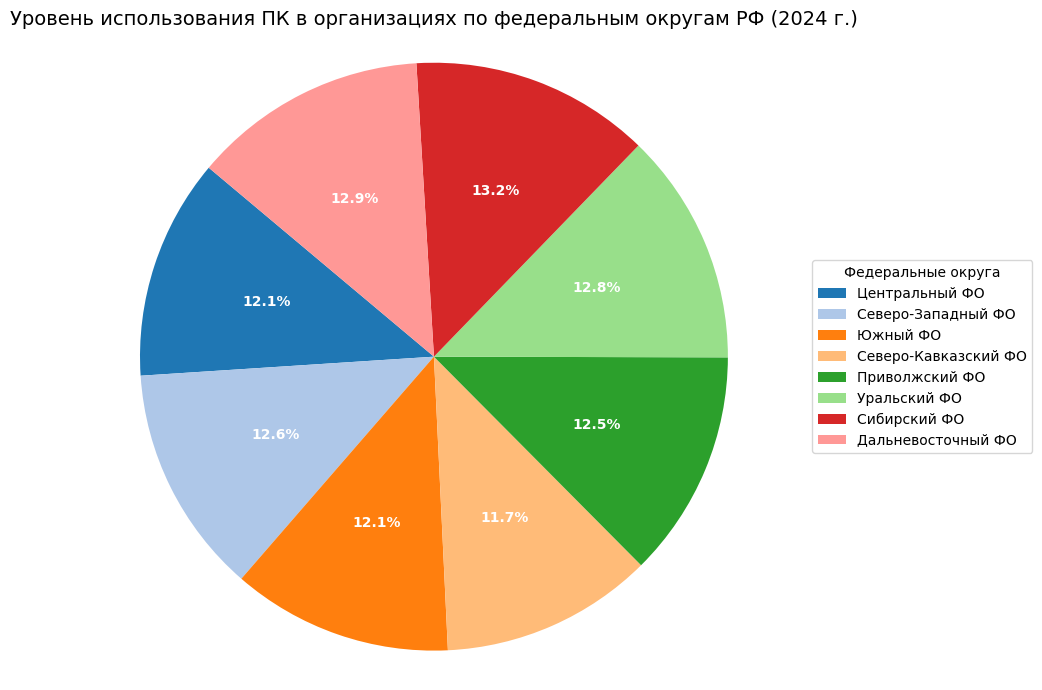

In [ ]:
import matplotlib.pyplot as plt

# Данные
districts = [
    'Центральный ФО',
    'Северо-Западный ФО',
    'Южный ФО',
    'Северо-Кавказский ФО',
    'Приволжский ФО',
    'Уральский ФО',
    'Сибирский ФО',
    'Дальневосточный ФО'
]

values = [74.9, 77.7, 74.8, 72.1, 77.2, 78.9, 81.4, 79.8]

# Цвета
colors = plt.cm.tab20.colors[:len(districts)]

# Построение без встроенных подписей
plt.figure(figsize=(10, 7))
wedges, _, autotexts = plt.pie(
    values,
    labels=None,  # ← отключаем подписи на сегментах
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Настройка процентов
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Добавляем легенду
plt.legend(wedges, districts, title="Федеральные округа", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Заголовок и пропорции
plt.title('Уровень использования ПК в организациях по федеральным округам РФ (2024 г.)', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

Самый высокий уровень использования персональных компьютеров — в Сибирском федеральном округе (81.4%).
Наименьший — в Северо-Кавказском ФО (72.1%), что значительно ниже среднего по стране (76.8%).
Остальные округа находятся в диапазоне 74.8–79.8%, то есть близки к общероссийскому уровню.
Разница между лидером и аутсайдером — почти 10 процентных пунктов, что указывает на региональную неравномерность цифровизации.

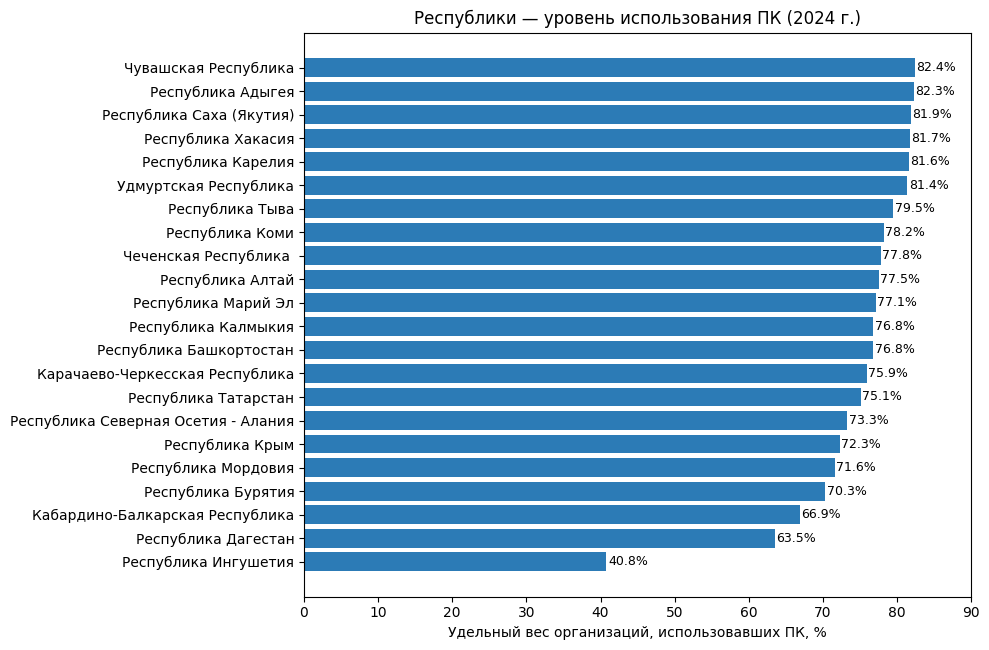

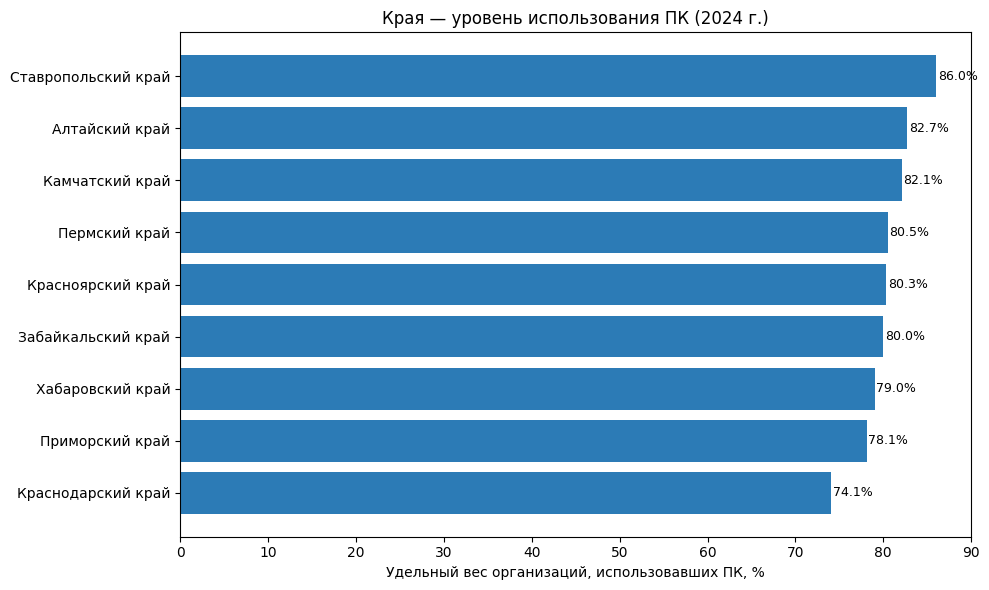

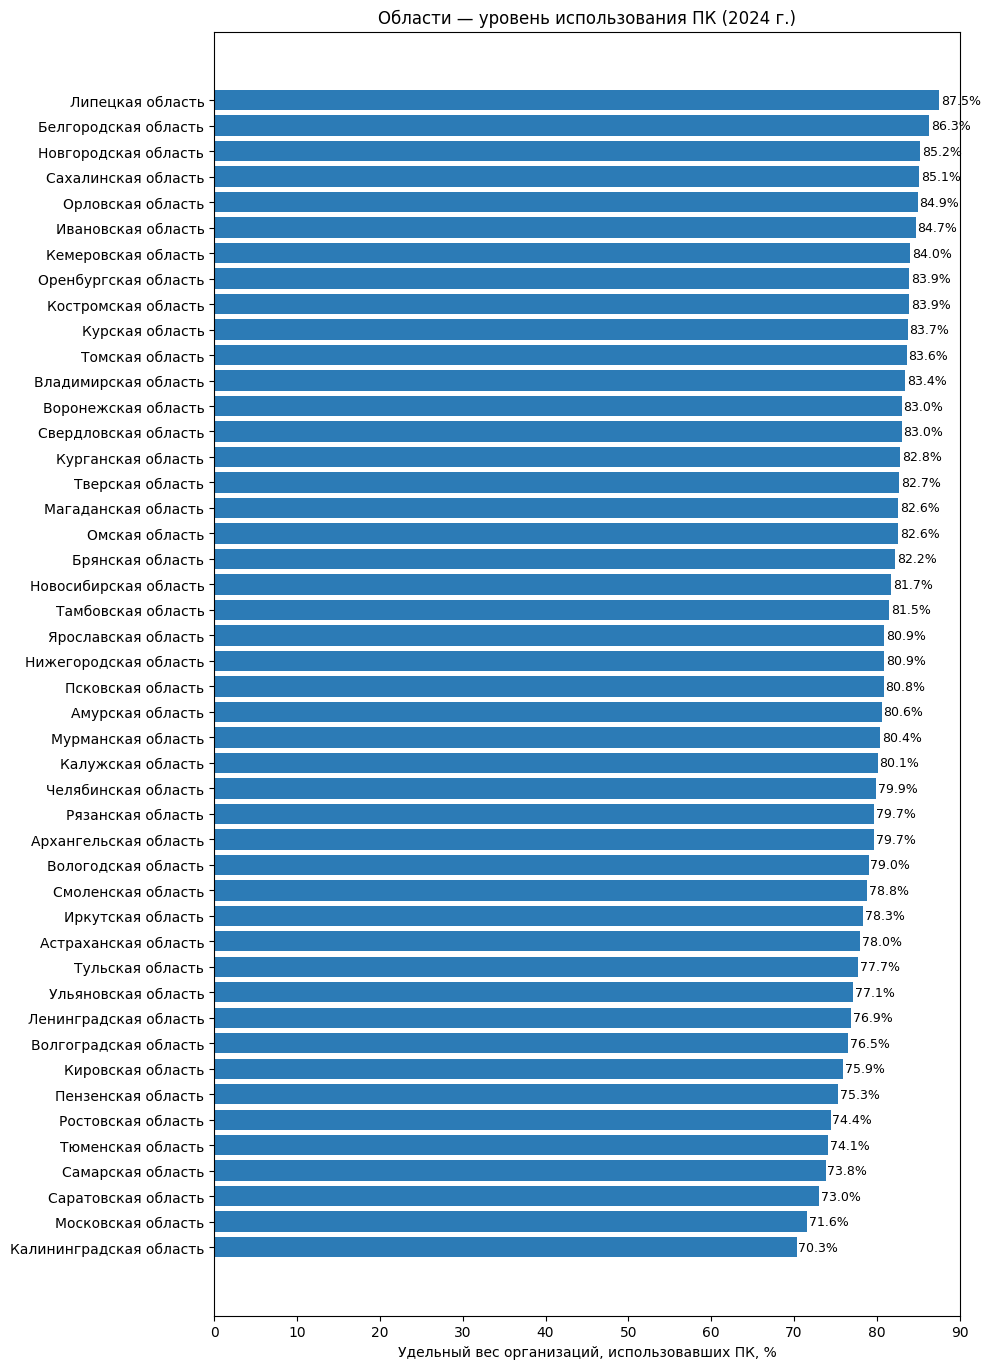

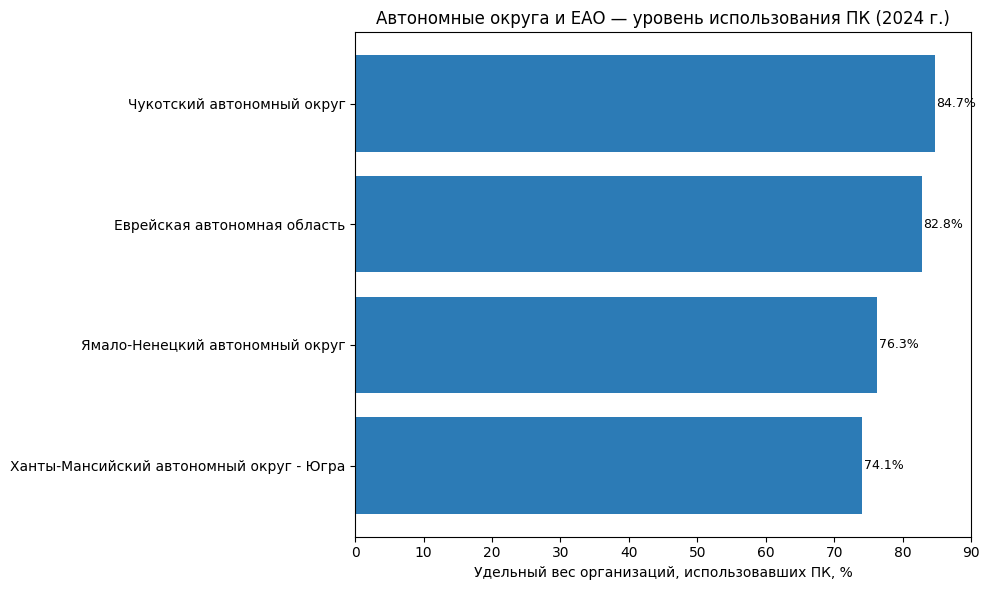

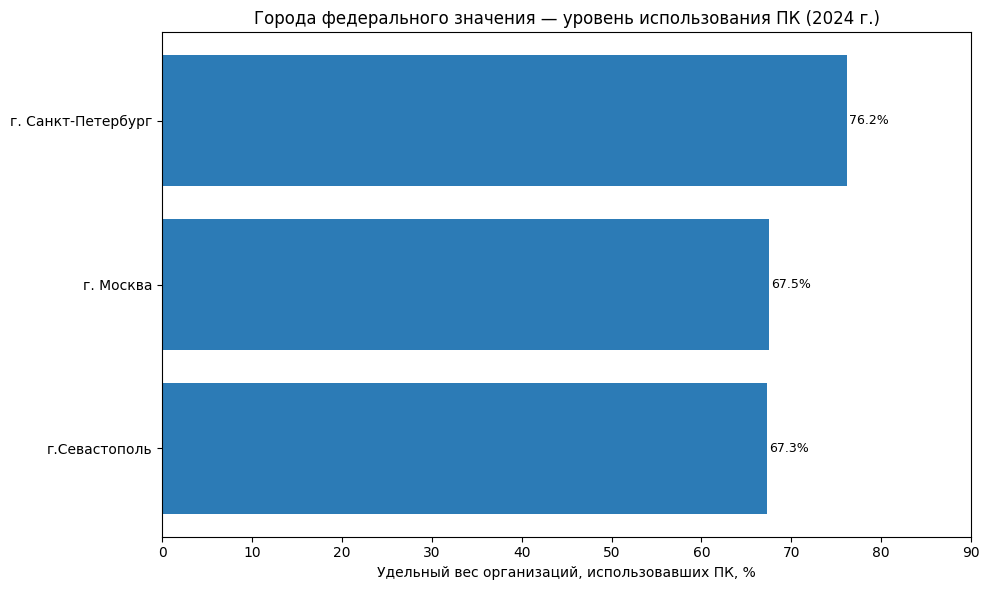

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Загрузка данных
df = pd.read_excel('ikt_org.xlsx', header=None, names=['region', 'value'])

# Преобразуем значения в числовой формат
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df = df.dropna(subset=['value']).reset_index(drop=True)

# Функция для определения типа субъекта
def classify_region(name):
    name = str(name).strip()
    # Исключаем уточнения
    if 'без АО' in name or 'в том числе' in name or name.startswith('1)') or name.startswith('2)'):
        return None
    if name in ['г. Москва', 'г. Санкт-Петербург', 'г.Севастополь', 'г. Севастополь']:
        return 'Город федерального значения'
    if 'автономный округ' in name.lower() or 'Чукотский' in name or 'Еврейская автономная область' in name:
        return 'Автономный округ'
    if 'республика' in name.lower() or 'Удмуртская Республика' in name or 'Чеченская Республика' in name:
        return 'Республика'
    if 'край' in name.lower():
        return 'Край'
    if 'область' in name.lower():
        return 'Область'
    # Остальное (маловероятно)
    return None

df['type'] = df['region'].apply(classify_region)
df = df[df['type'].notna()].copy()

# Группы для визуализации
groups = {
    'Республика': 'Республики',
    'Край': 'Края',
    'Область': 'Области',
    'Автономный округ': 'Автономные округа и ЕАО',
    'Город федерального значения': 'Города федерального значения'
}

# Построение диаграмм
for code, title in groups.items():
    group_df = df[df['type'] == code].copy()
    if group_df.empty:
        continue
    group_df = group_df.sort_values('value', ascending=True)  # для горизонтального графика

    plt.figure(figsize=(10, max(6, len(group_df) * 0.3)))
    bars = plt.barh(group_df['region'], group_df['value'], color='#2c7bb6')

    # Подписи значений
    for bar in bars:
        plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
                 f'{bar.get_width():.1f}%', va='center', fontsize=9)

    plt.xlabel('Удельный вес организаций, использовавших ПК, %')
    plt.title(f'{title} — уровень использования ПК (2024 г.)')
    plt.xlim(0, 90)
    plt.tight_layout()
    plt.show()

Уровень цифровизации в республиках наиболее неоднороден.
Лидеры: Чувашская Республика (82,4%), Удмуртская Республика (81,4%), Республика Хакасия (81,7%) — демонстрируют высокий уровень внедрения ПК.
Аутсайдер: Республика Ингушетия (40,8%) — показатель вдвое ниже, чем у большинства регионов.
В целом, большинство республик находятся в диапазоне 65–82%.
Все края показывают стабильно высокий уровень использования ПК — от 74,1% (Краснодарский край) до 86,0% (Ставропольский край).
Ставропольский край — один из лидеров по всей стране.
Нет ни одного края с показателем ниже 74%, что говорит о высокой степени цифровой зрелости в этой категории субъектов. Области демонстрируют самый широкий разброс значений, но при этом включают абсолютных лидеров:
Липецкая область (87,5%) — самый высокий показатель в стране,
Белгородская (86,3%), Новгородская (85,2%), Сахалинская (85,1%) — также в топ-5.
Среди аутсайдеров: Московская область (71,6%), Калининградская область (70,3%) — заметно ниже среднего по РФ (76,8%).
В целом, большинство областей находятся в диапазоне 77–85%, что свидетельствует о высоком уровне цифровизации в региональной экономике.Несмотря на удалённость и специфическую экономическую структуру (часто — добывающая промышленность), автономные округа показывают очень высокие результаты:
Чукотский АО (84,7%), Еврейская АО (82,8%), Ненецкий АО (76,3%).Парадоксальный результат: три крупнейших мегаполиса — Москва (67,5%), Санкт-Петербург (76,2%), Севастополь (67,3%) — показывают ниже средние по стране значения.
Особенно выделяется Москва, где доля организаций, использующих ПК, на 9,3 п.п. ниже, чем в среднем по РФ.

Количество субъектов: 84


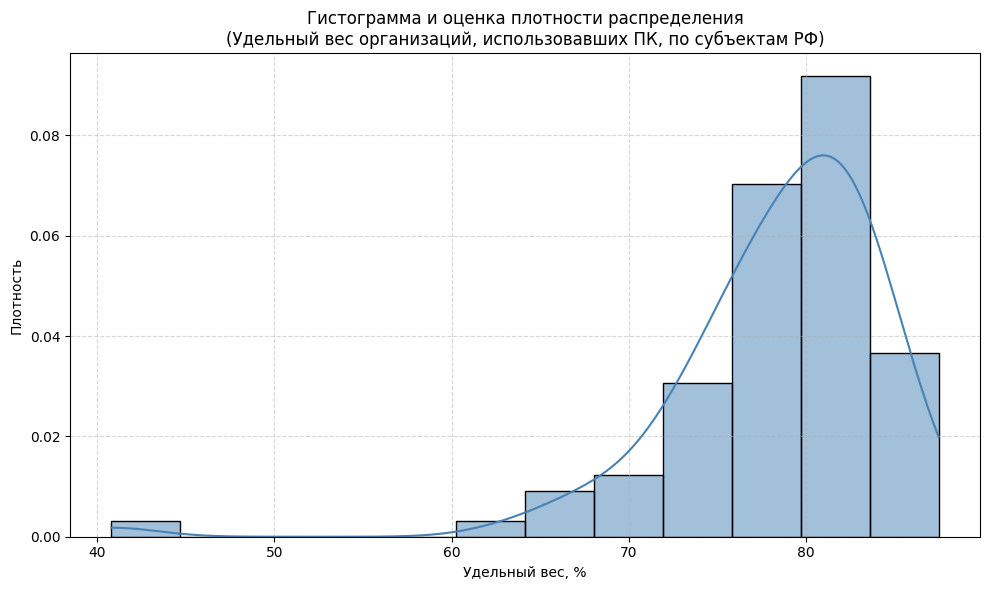


=== Проверка гипотезы о нормальности ===
Статистика Шапиро-Уилка: 0.7967
p-value: 0.000000
→ При уровне значимости 0.05: распределение НЕ является нормальным (H₀ отвергается).


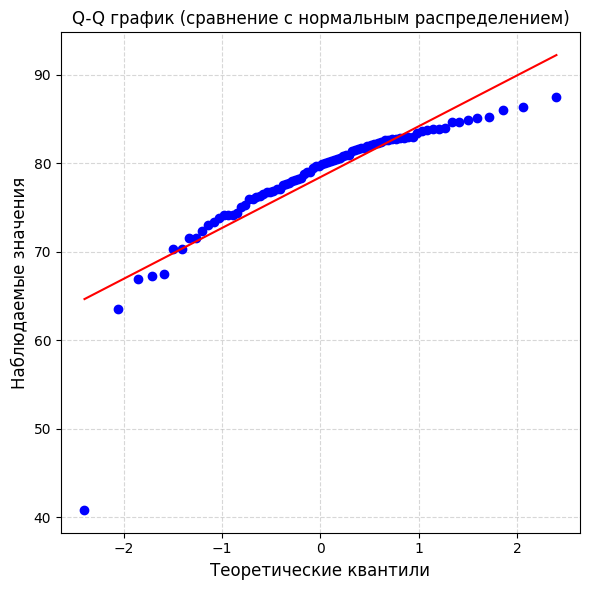


Асимметрия (skewness): -2.720  → отрицательная = хвост слева
Эксцесс (kurtosis): 12.751     → >0 = острый пик


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

# 1. Загрузка данных
df = pd.read_excel('ikt_org.xlsx', header=None, names=['region', 'value'])

# 2. Преобразуем значения в числовой формат
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# 3. Функция для определения, является ли строка субъектом РФ
def is_subject(name):
    if pd.isna(name):
        return False
    name = str(name).strip()
    # Исключаем агрегаты и уточнения
    exclude_patterns = [
        r'Российская Федерация',
        r'федеральный округ',
        r'в том числе',
        r'\(без АО\)',
        r'1\)',
        r'2\)',
        r'" … "',
        r'^\s*$'
    ]
    for pattern in exclude_patterns:
        if re.search(pattern, name, re.IGNORECASE):
            return False
    # Оставляем только субъекты (должны содержать: область, край, республика, АО, автономная, г\.)
    include_patterns = [
        r'область',
        r'край',
        r'республика',
        r'автономный округ',
        r'автономная область',
        r'г\.'
    ]
    for pattern in include_patterns:
        if re.search(pattern, name, re.IGNORECASE):
            return True
    return False

df['is_subject'] = df['region'].apply(is_subject)
subjects = df[df['is_subject']].copy()

# Убедимся, что у нас 85 субъектов
print(f"Количество субъектов: {len(subjects)}")

# Извлекаем значения
data = subjects['value'].dropna().values

# 4. Гистограмма + оценка плотности
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=12, kde=True, color='steelblue', stat='density')
plt.title('Гистограмма и оценка плотности распределения\n(Удельный вес организаций, использовавших ПК, по субъектам РФ)')
plt.xlabel('Удельный вес, %')
plt.ylabel('Плотность')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 5. Тест Шапиро-Уилка на нормальность
shapiro_stat, p_value = stats.shapiro(data)

print("\n=== Проверка гипотезы о нормальности ===")
print(f"Статистика Шапиро-Уилка: {shapiro_stat:.4f}")
print(f"p-value: {p_value:.6f}")

alpha = 0.05
if p_value < alpha:
    print(f"→ При уровне значимости {alpha}: распределение НЕ является нормальным (H₀ отвергается).")
else:
    print(f"→ При уровне значимости {alpha}: нет оснований отвергать нормальность (H₀ не отвергается).")

# 6. Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.xlabel('Теоретические квантили', fontsize=12)
plt.ylabel('Наблюдаемые значения', fontsize=12)
plt.title("Q-Q график (сравнение с нормальным распределением)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 7. Дополнительно: асимметрия и эксцесс
skewness = stats.skew(data)
kurtosis = stats.kurtosis(data)

print(f"\nАсимметрия (skewness): {skewness:.3f}  → отрицательная = хвост слева")
print(f"Эксцесс (kurtosis): {kurtosis:.3f}     → >0 = острый пик")

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import re

# 1. Загрузка данных
df = pd.read_excel('ikt_org.xlsx', header=None, names=['region', 'value'])

# 2. Преобразуем значения в числовой формат
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# 3. Функция для определения — является ли строка субъектом РФ
def is_subject(name):
    if pd.isna(name):
        return False
    name = str(name).strip()
    # Исключаем агрегаты и уточнения
    exclude_patterns = [
        r'Российская Федерация',
        r'федеральный округ',
        r'в том числе',
        r'\(без АО\)',
        r'1\)',
        r'2\)',
        r'" … "',
        r'^\s*$'
    ]
    for pattern in exclude_patterns:
        if re.search(pattern, name, re.IGNORECASE):
            return False
    # Оставляем только субъекты РФ по ключевым словам
    include_patterns = [
        r'область',
        r'край',
        r'республика',
        r'автономный округ',
        r'автономная область',
        r'г\.'
    ]
    for pattern in include_patterns:
        if re.search(pattern, name, re.IGNORECASE):
            return True
    return False

# Применяем фильтр
df['is_subject'] = df['region'].apply(is_subject)
subjects = df[df['is_subject']].copy()

# Проверка количества
n = len(subjects)
print(f"Количество субъектов РФ: {n}")

# Извлекаем данные
data = subjects['value'].dropna().values

# 4. Расчёт статистик
mean_val = np.mean(data)
std_val = np.std(data, ddof=1)  # выборочное стандартное отклонение
se = std_val / np.sqrt(n)

# 5. Доверительный интервал (95%)
confidence = 0.95
alpha = 1 - confidence
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)
margin_error = t_crit * se

ci_low = mean_val - margin_error
ci_high = mean_val + margin_error

# 6. Вывод результатов
print("\nИнтервальная оценка среднего: ")
print(f"Выборочное среднее: {mean_val:.2f}%")
print(f"Стандартное отклонение: {std_val:.2f}%")
print(f"Стандартная ошибка: {se:.3f}%")
print(f"Критическое t-значение (df={n-1}): {t_crit:.3f}")
print(f"Погрешность: ±{margin_error:.2f}%")
print(f"\n95% доверительный интервал для среднего:")
print(f"({ci_low:.1f}%, {ci_high:.1f}%)")

# 7. Интерпретация
print("\nИнтерпретация:")
print(f"С 95% доверительной вероятностью истинное среднее значение")
print(f"удельного веса организаций, использующих ПК в типичном субъекте РФ,")
print(f"находится в интервале от {ci_low:.1f}% до {ci_high:.1f}%.")

Количество субъектов РФ: 84

Интервальная оценка среднего: 
Выборочное среднее: 78.43%
Стандартное отклонение: 6.39%
Стандартная ошибка: 0.697%
Критическое t-значение (df=83): 1.989
Погрешность: ±1.39%

95% доверительный интервал для среднего:
(77.0%, 79.8%)

Интерпретация:
С 95% доверительной вероятностью истинное среднее значение
удельного веса организаций, использующих ПК в типичном субъекте РФ,
находится в интервале от 77.0% до 79.8%.


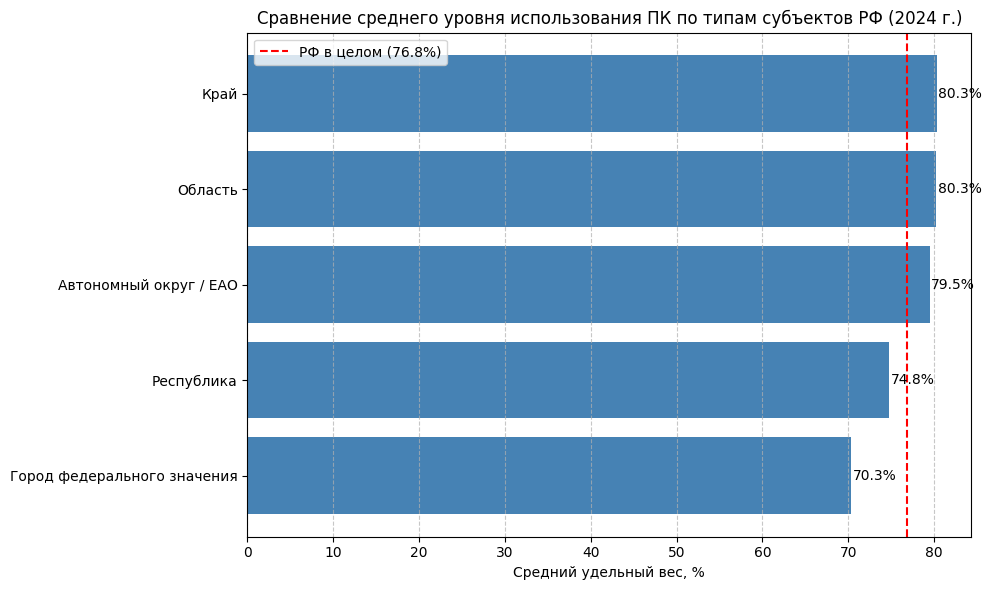

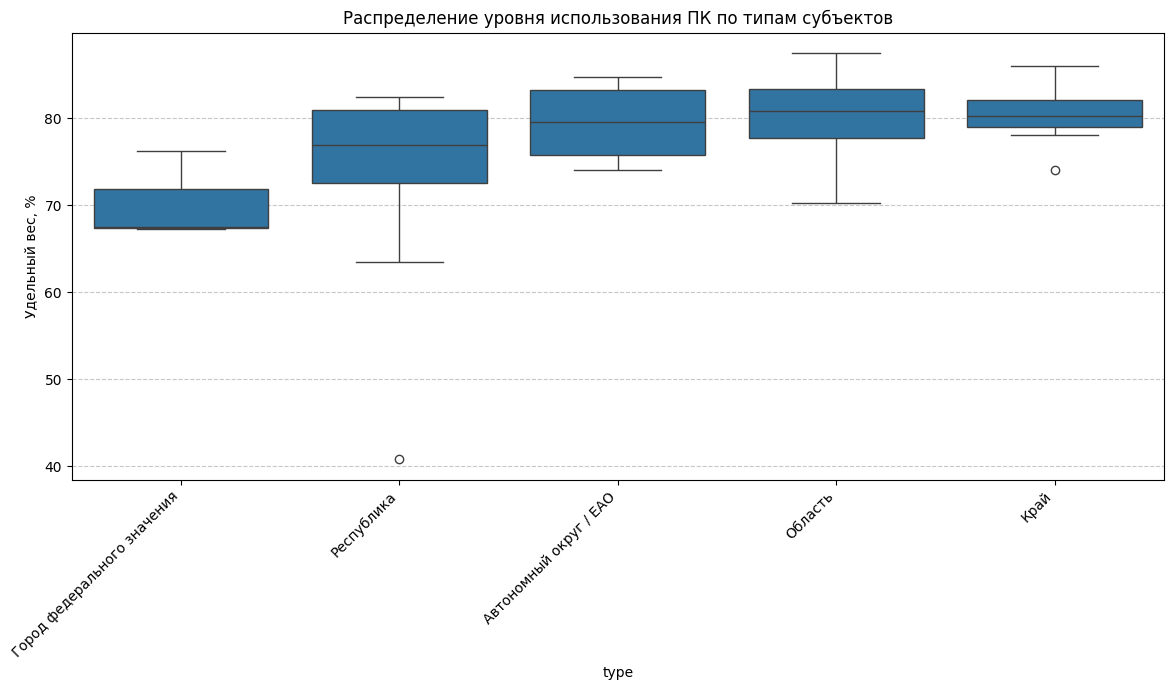

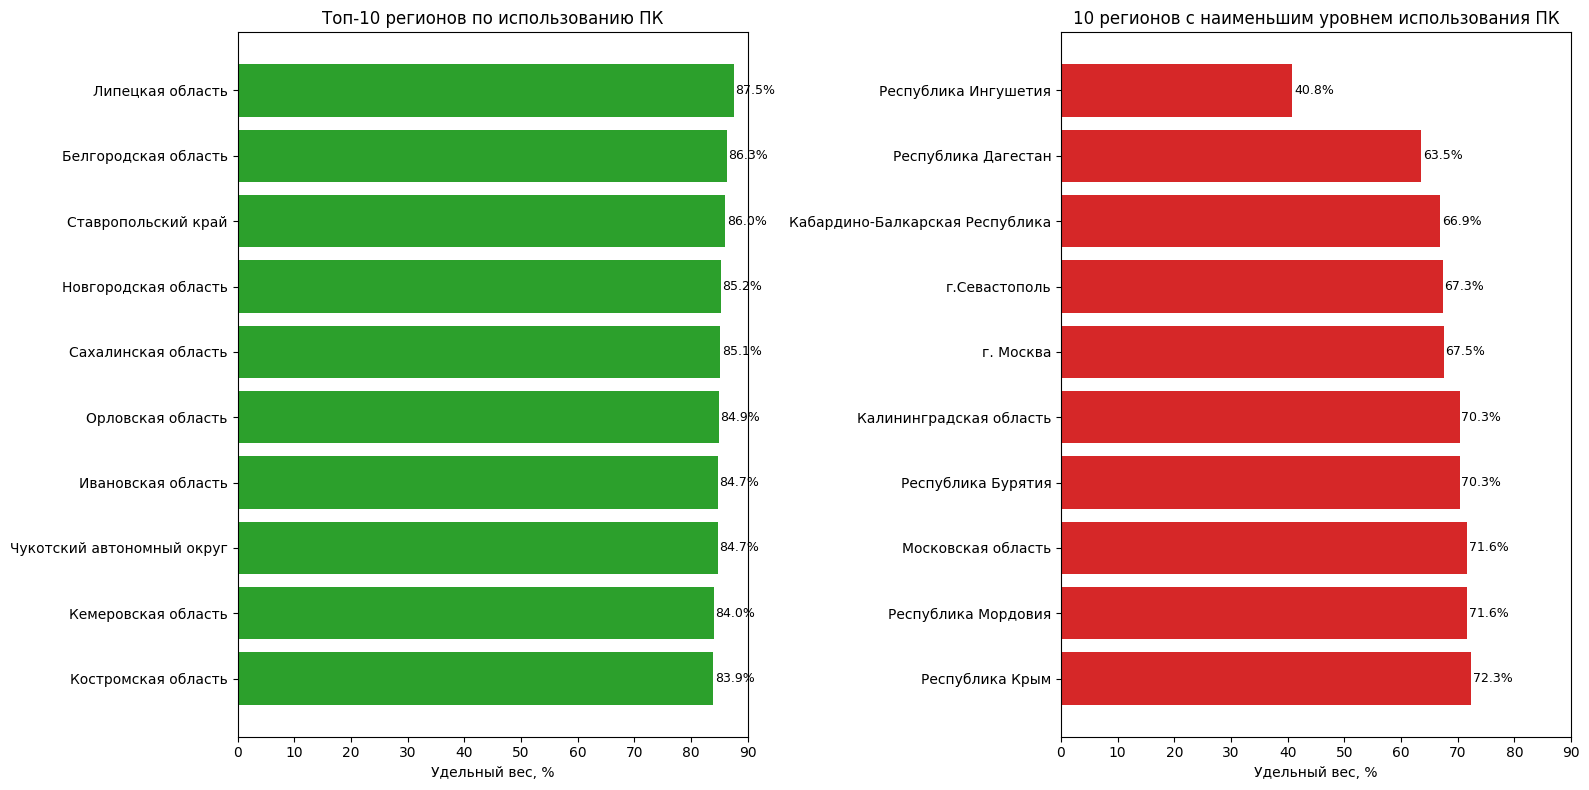

In [ ]:
#2.1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Загрузка данных
df = pd.read_excel('ikt_org.xlsx', header=None, names=['region', 'value'])
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Классификация регионов
def classify_region(name):
    if pd.isna(name):
        return None
    name = str(name).strip()
    if re.search(r'Российская Федерация|федеральный округ|в том числе|без АО|1\)|2\)|" … "', name, re.IGNORECASE):
        return None
    if re.search(r'г\.\s*Москва|г\.\s*Санкт-Петербург|г\.\s*Севастополь', name, re.IGNORECASE):
        return 'Город федерального значения'
    if re.search(r'автономный округ|Чукотский|Еврейская автономная область', name, re.IGNORECASE):
        return 'Автономный округ / ЕАО'
    if re.search(r'республика|Удмуртская|Чеченская|Кабардино-Балкарская|Карачаево-Черкесская|Северная Осетия', name, re.IGNORECASE):
        return 'Республика'
    if 'край' in name.lower():
        return 'Край'
    if 'область' in name.lower():
        return 'Область'
    return None

df['type'] = df['region'].apply(classify_region)
df_clean = df[df['type'].notna()].copy()

# Общероссийский показатель
russia_value = 76.8

# 1. Столбчатая диаграмма средних по типам
plt.figure(figsize=(10, 6))
mean_by_type = df_clean.groupby('type')['value'].mean().sort_values(ascending=True)
bars = plt.barh(mean_by_type.index, mean_by_type.values, color='steelblue')
plt.axvline(x=russia_value, color='red', linestyle='--', label=f'РФ в целом ({russia_value}%)')
for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}%', va='center', fontsize=10)
plt.xlabel('Средний удельный вес, %')
plt.title('Сравнение среднего уровня использования ПК по типам субъектов РФ (2024 г.)')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Boxplot распределения
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_clean, x='type', y='value', order=mean_by_type.index)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Удельный вес, %')
plt.title('Распределение уровня использования ПК по типам субъектов')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Топ-10 и антирейтинг (горизонтальная диаграмма)
top10 = df_clean.nlargest(10, 'value')
bottom10 = df_clean.nsmallest(10, 'value')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Топ-10
bars1 = ax1.barh(top10['region'][::-1], top10['value'][::-1], color='#2ca02c')
ax1.set_xlabel('Удельный вес, %')
ax1.set_title('Топ-10 регионов по использованию ПК')
ax1.set_xlim(0, 90)
for bar in bars1:
    ax1.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}%', va='center', fontsize=9)

# Антирейтинг
bars2 = ax2.barh(bottom10['region'][::-1], bottom10['value'][::-1], color='#d62728')
ax2.set_xlabel('Удельный вес, %')
ax2.set_title('10 регионов с наименьшим уровнем использования ПК')
ax2.set_xlim(0, 90)
for bar in bars2:
    ax2.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}%', va='center', fontsize=9)

plt.tight_layout()
plt.show()

Количество субъектов РФ: 84


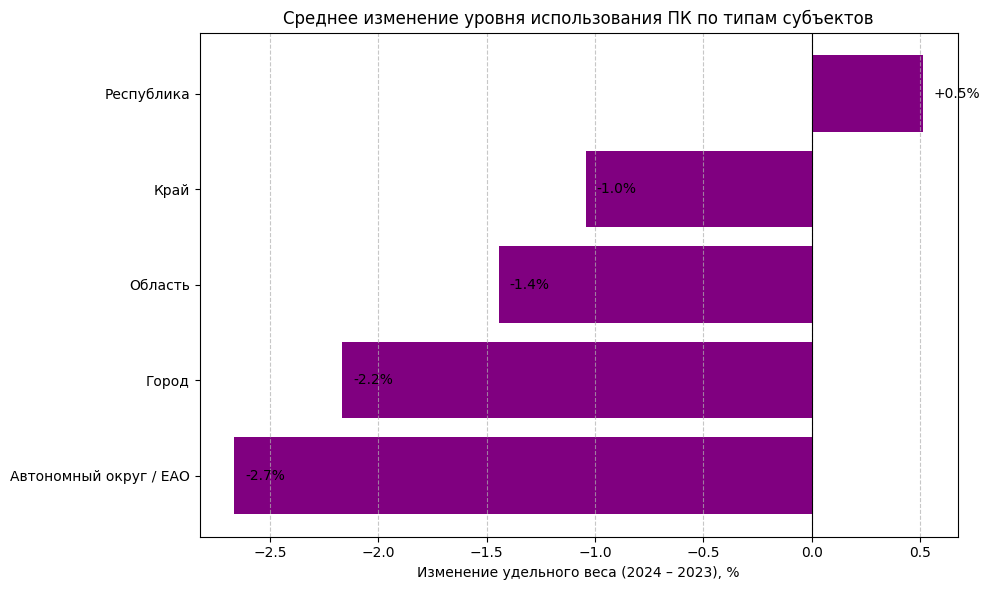

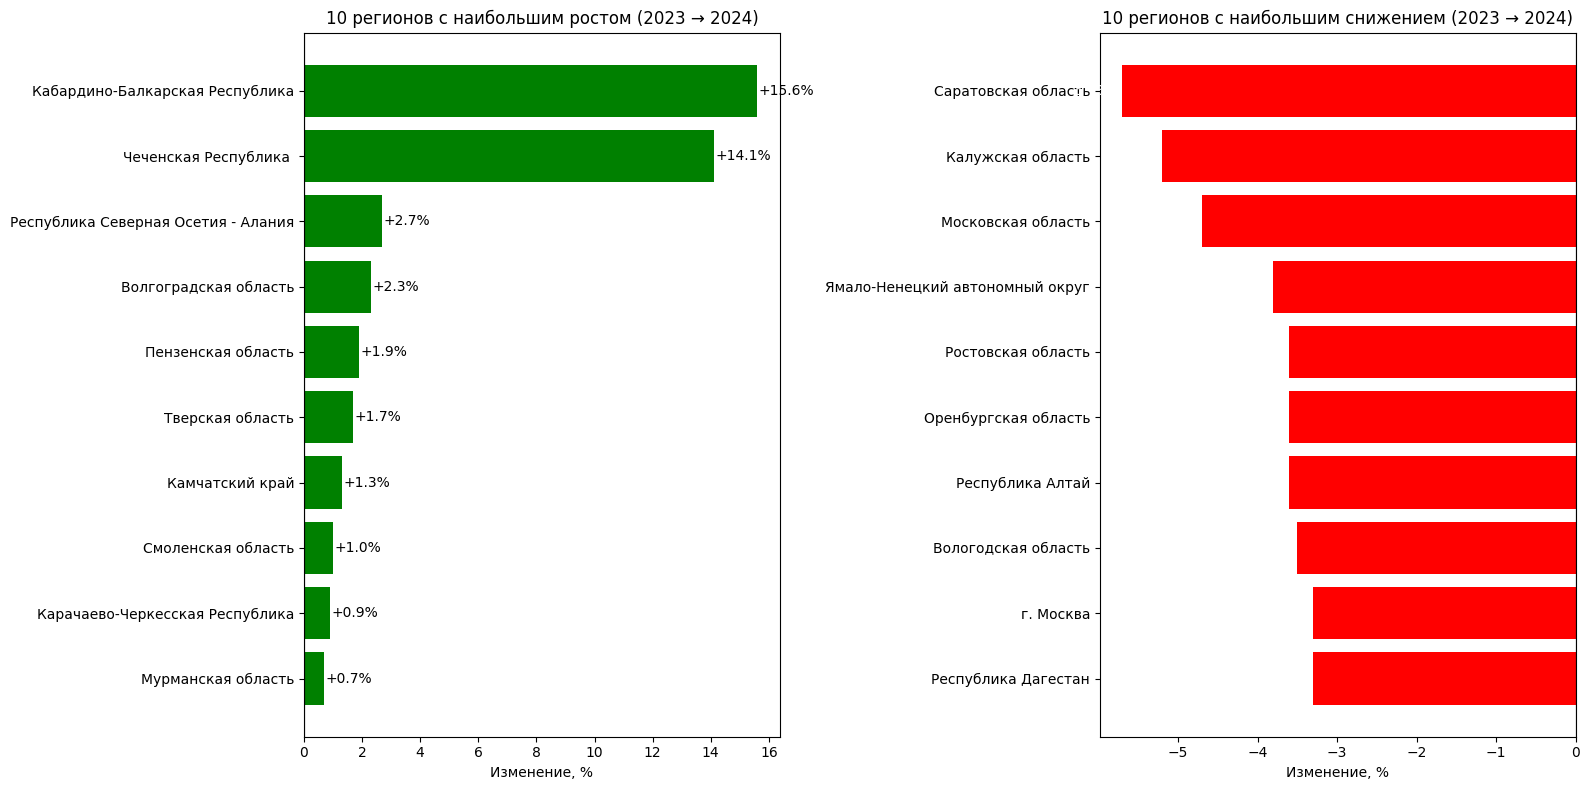

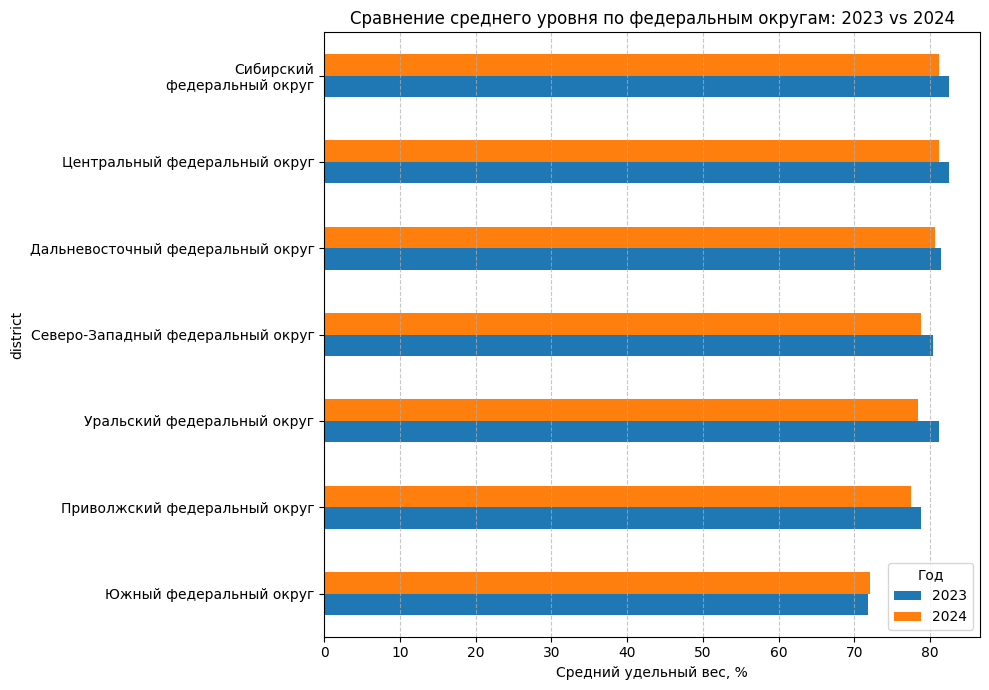

In [ ]:
#2.2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# --------------------------------------------------
# 1. Загрузка данных (с учётом структуры: A=регион, B=2023, C=2024)
# --------------------------------------------------
df = pd.read_excel('kr.xlsx', header=None)

# Проверим количество столбцов
if df.shape[1] < 3:
    raise ValueError("Файл должен содержать как минимум 3 столбца: регион, 2023, 2024.")

# Назначим колонки
df.columns = ['region', '2023', '2024']

# Преобразуем числовые столбцы
df['2023'] = pd.to_numeric(df['2023'], errors='coerce')
df['2024'] = pd.to_numeric(df['2024'], errors='coerce')

# --------------------------------------------------
# 2. Классификация строк
# --------------------------------------------------
def get_row_type(name):
    if pd.isna(name):
        return 'unknown'
    name = str(name).strip()
    if 'Российская Федерация' in name:
        return 'russia'
    if 'федеральный округ' in name.lower():
        return 'federal_district'
    if 'в том числе' in name.lower() or '(без АО)' in name or name.startswith('1)') or name.startswith('2)'):
        return 'sub_region_note'
    if re.search(r'область|край|республика|автономный округ|автономная область|г\.', name, re.IGNORECASE):
        return 'subject'
    return 'other'

df['row_type'] = df['region'].apply(get_row_type)

# Оставляем только субъекты РФ
subjects = df[df['row_type'] == 'subject'].copy()

print(f"Количество субъектов РФ: {len(subjects)}")

# --------------------------------------------------
# 3. Добавляем федеральные округа
# --------------------------------------------------
district_mapping = {}
regions = df['region'].tolist()
current_district = None

for r in regions:
    if pd.isna(r):
        continue
    r = str(r).strip()
    if 'федеральный округ' in r.lower():
        current_district = r
    elif get_row_type(r) == 'subject':
        district_mapping[r] = current_district

subjects['district'] = subjects['region'].map(district_mapping)

# --------------------------------------------------
# 4. Рассчитываем изменение: 2024 - 2023
# --------------------------------------------------
subjects = subjects.dropna(subset=['2023', '2024'])
subjects['change'] = subjects['2024'] - subjects['2023']

# --------------------------------------------------
# 5. График 1: Среднее изменение по типам субъектов
# --------------------------------------------------
def classify_subject(name):
    name = str(name)
    if 'республика' in name.lower() or any(x in name for x in ['Удмуртская', 'Чеченская', 'Кабардино-Балкарская', 'Северная Осетия']):
        return 'Республика'
    elif 'край' in name.lower():
        return 'Край'
    elif 'область' in name.lower():
        return 'Область'
    elif 'автономный округ' in name.lower() or 'Чукотский' in name or 'Еврейская' in name:
        return 'Автономный округ / ЕАО'
    elif 'г.' in name:
        return 'Город'
    else:
        return 'Прочее'

subjects['type'] = subjects['region'].apply(classify_subject)

# Среднее изменение по типам
change_by_type = subjects.groupby('type')['change'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(change_by_type.index, change_by_type.values, color='purple')
for bar in bars:
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():+.1f}%', va='center')
plt.xlabel('Изменение удельного веса (2024 – 2023), %')
plt.title('Среднее изменение уровня использования ПК по типам субъектов')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 6. График 2: Топ-10 роста и снижения
# --------------------------------------------------
top_growth = subjects.nlargest(10, 'change')[['region', '2023', '2024', 'change']]
top_decline = subjects.nsmallest(10, 'change')[['region', '2023', '2024', 'change']]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Рост
bars1 = ax1.barh(top_growth['region'][::-1], top_growth['change'][::-1], color='green')
ax1.set_xlabel('Изменение, %')
ax1.set_title('10 регионов с наибольшим ростом (2023 → 2024)')
ax1.axvline(0, color='black', linewidth=0.8)
for bar in bars1:
    ax1.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():+.1f}%', va='center')

# Снижение
bars2 = ax2.barh(top_decline['region'][::-1], top_decline['change'][::-1], color='red')
ax2.set_xlabel('Изменение, %')
ax2.set_title('10 регионов с наибольшим снижением (2023 → 2024)')
ax2.axvline(0, color='black', linewidth=0.8)
for bar in bars2:
    ax2.text(bar.get_width() - 0.15, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():+.1f}%', va='center', ha='right', color='white')

plt.tight_layout()
plt.show()

# --------------------------------------------------
# 7. График 3: Сравнение 2023 и 2024 по федеральным округам (средние)
# --------------------------------------------------
district_2023 = subjects.groupby('district')['2023'].mean()
district_2024 = subjects.groupby('district')['2024'].mean()

district_comparison = pd.DataFrame({
    '2023': district_2023,
    '2024': district_2024
}).sort_values('2024', ascending=True)

district_comparison.plot(kind='barh', figsize=(10, 7), color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Средний удельный вес, %')
plt.title('Сравнение среднего уровня по федеральным округам: 2023 vs 2024')
plt.legend(title='Год')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

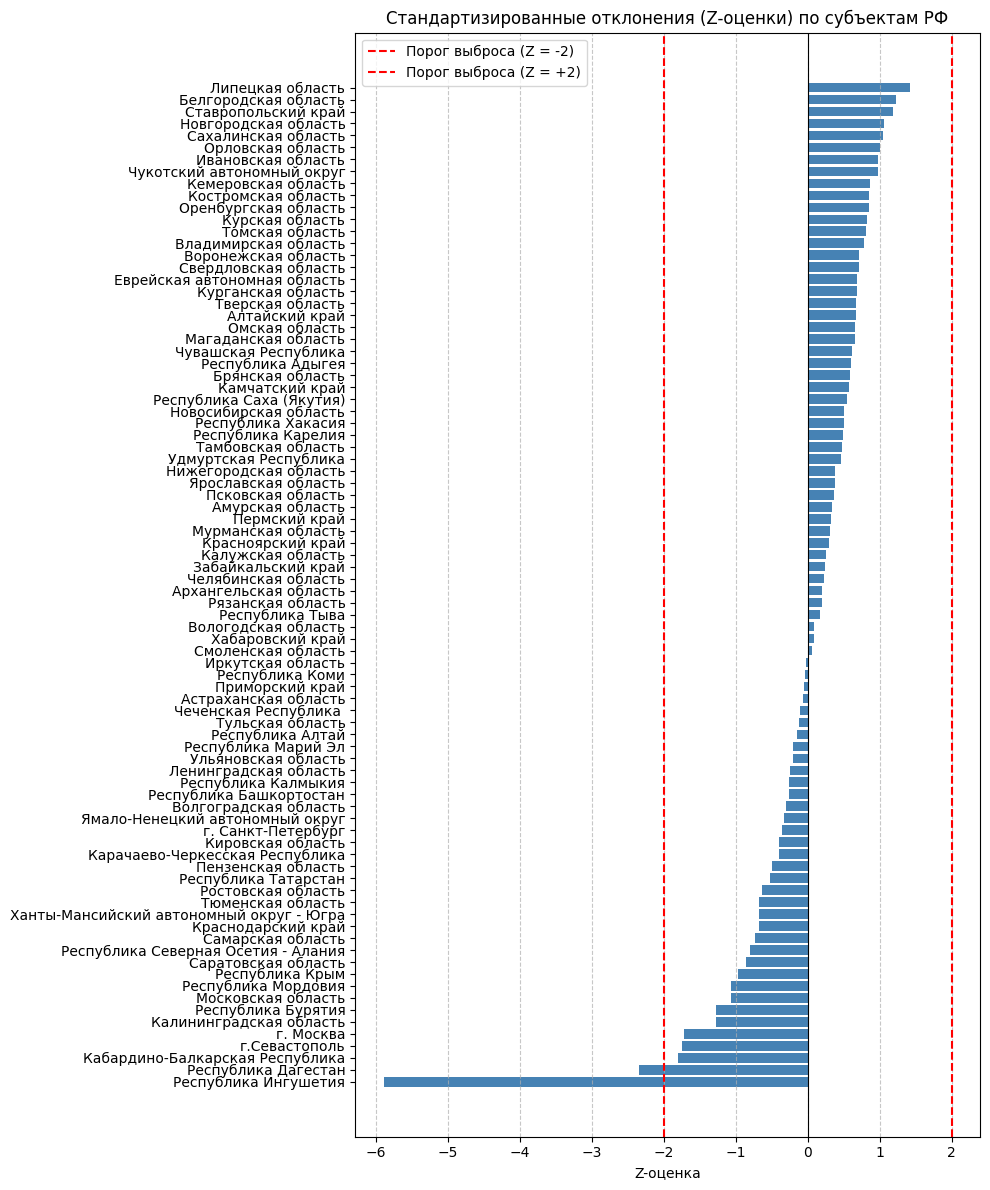

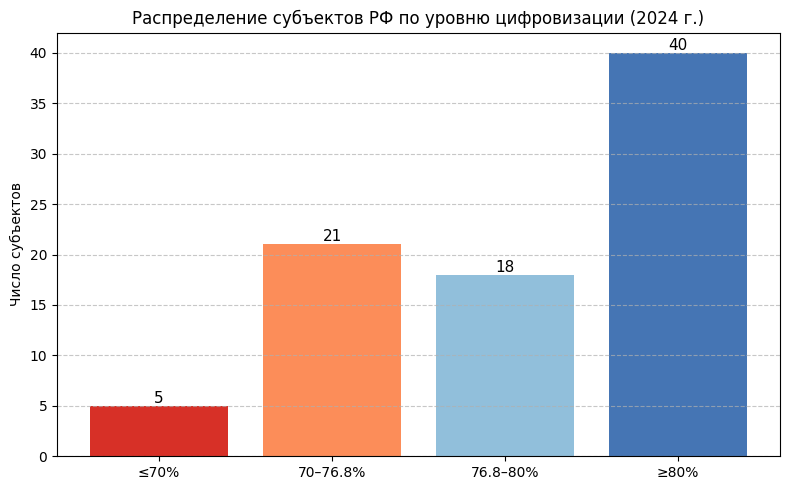

In [ ]:
#2.3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

# --------------------------------------------------
# 1. Загрузка и очистка данных
# --------------------------------------------------
df = pd.read_excel('ikt_org.xlsx', header=None, names=['region', 'value'])
df['value'] = pd.to_numeric(df['value'], errors='coerce')

def is_subject(name):
    if pd.isna(name):
        return False
    name = str(name).strip()
    if re.search(r'Российская Федерация|федеральный округ|в том числе|без АО|1\)|2\)|" … "', name, re.IGNORECASE):
        return False
    if re.search(r'область|край|республика|автономный округ|автономная область|г\.', name, re.IGNORECASE):
        return True
    return False

df['is_subject'] = df['region'].apply(is_subject)
subjects = df[df['is_subject']].copy()

# --------------------------------------------------
# 2. Расчёт Z-оценок
# --------------------------------------------------
mean_val = subjects['value'].mean()
std_val = subjects['value'].std(ddof=1)
subjects['z_score'] = (subjects['value'] - mean_val) / std_val

# --------------------------------------------------
# 3. График 1: Z-оценки по регионам (горизонтальная диаграмма)
# --------------------------------------------------
subjects_sorted = subjects.sort_values('z_score')
plt.figure(figsize=(10, 12))
bars = plt.barh(subjects_sorted['region'], subjects_sorted['z_score'], color='steelblue')
plt.axvline(0, color='black', linewidth=0.8)
plt.axvline(-2, color='red', linestyle='--', label='Порог выброса (Z = -2)')
plt.axvline(2, color='red', linestyle='--', label='Порог выброса (Z = +2)')
plt.xlabel('Z-оценка')
plt.title('Стандартизированные отклонения (Z-оценки) по субъектам РФ')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --------------------------------------------------
# 4. График 2: Распределение по пороговым уровням
# --------------------------------------------------
russia_level = 76.8
subjects['group'] = pd.cut(
    subjects['value'],
    bins=[0, 70, russia_level, 80, 100],
    labels=['≤70%', '70–76.8%', '76.8–80%', '≥80%'],
    include_lowest=True
)

group_counts = subjects['group'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
bars = plt.bar(group_counts.index, group_counts.values, color=['#d73027', '#fc8d59', '#91bfdb', '#4575b4'])
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
             f'{int(bar.get_height())}', ha='center', fontsize=11)
plt.ylabel('Число субъектов')
plt.title('Распределение субъектов РФ по уровню цифровизации (2024 г.)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()